**1.importing the dependencies**

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle


**2.Data Loading & Understanding**

In [151]:
 #reading csv data to pandas dataframe
 df=pd.read_csv("/content/train.csv")

Initial Inspection

In [152]:
df.shape

(800, 22)

In [153]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [154]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [155]:
#display all columns of a dataframe
pd.set_option('display.max_columns',None)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [157]:
#convert age column datatype to integer
df['age']=df['age'].astype('int64')

In [158]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [159]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [160]:
for col in df.columns:
  numerical_features=["ID","age","result"]
  if col not in numerical_features:
    print(col,df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [161]:
df=df.drop(columns=["ID","age_desc"])

In [162]:
df.shape

(800, 20)

In [163]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [164]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [165]:
#define the mapping dictionary for country names
mapping={
    "Viet Nam":"Vietnam",
    "AmericanSamoa":"United States",
    "Hong Kong":"China"
}
#replace value in the country column
df["contry_of_res"]=df["contry_of_res"].replace(mapping)

In [166]:
#target class distribution
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


**3.Exploratory Data Analysis**

In [167]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**UNIVARIATE ANALYSIS**

In [168]:
#set the desired theme
sns.set_theme(style="darkgrid")

**Distribution Plots**

27.96375
24.0


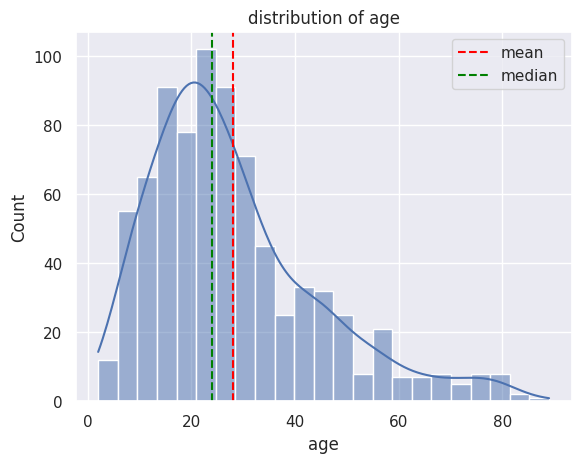

In [169]:
#histogram for age

sns.histplot(df["age"],kde=True)
plt.title("distribution of age")

age_mean=df["age"].mean()
age_median=df["age"].median()
print(age_mean)
print(age_median)

plt.axvline(age_mean,color="red",linestyle="dashed",label="mean")
plt.axvline(age_median,color="green",linestyle="dashed",label="median")
plt.legend()
plt.show()

8.537303106501248
9.605299308


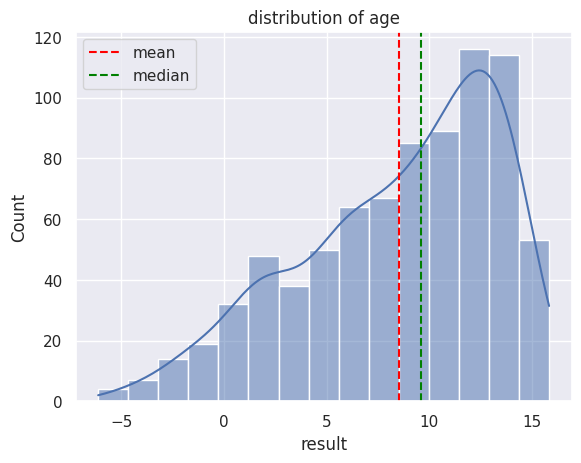

In [170]:
#histogram for result

sns.histplot(df["result"],kde=True)
plt.title("distribution of age")

result_mean=df["result"].mean()
result_median=df["result"].median()
print(result_mean)
print(result_median)

plt.axvline(result_mean,color="red",linestyle="dashed",label="mean")
plt.axvline(result_median,color="green",linestyle="dashed",label="median")
plt.legend()
plt.show()

**box plots for identifying outliers in the numerical columns**

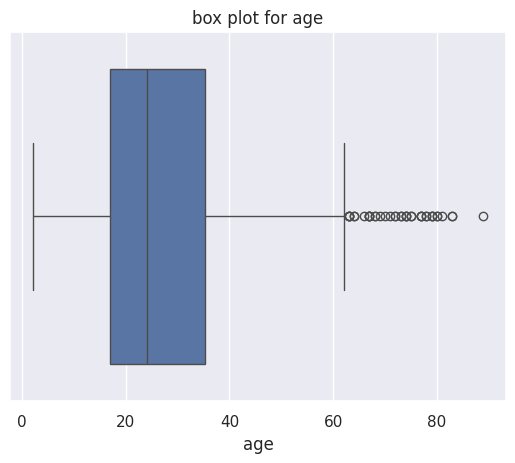

In [171]:
sns.boxplot(x=df["age"])
plt.title("box plot for age")
plt.xlabel("age")
plt.show()

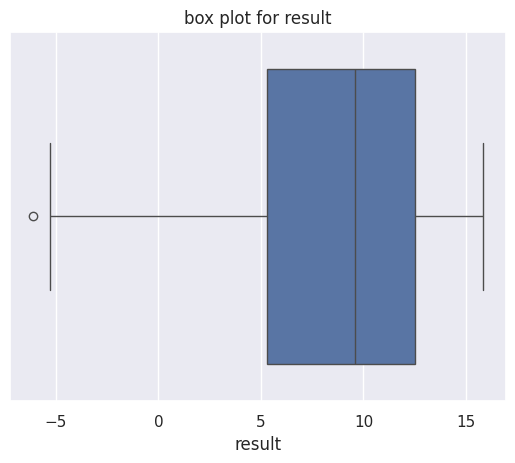

In [172]:
sns.boxplot(x=df["result"])
plt.title("box plot for result")
plt.xlabel("result")
plt.show()

In [173]:
#count the outliers using IQR method
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

age_outliers=df[(df["age"]<lower_limit) | (df["age"]>upper_limit)]
print(len(age_outliers))

39


In [174]:
#count the outliers using IQR method
Q1=df["result"].quantile(0.25)
Q3=df["result"].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

age_outliers=df[(df["result"]<lower_limit) | (df["result"]>upper_limit)]
print(len(age_outliers))

1


 **univariate analysis of categorical columns**

In [175]:
 df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [176]:
categorical=[]
for i in df.columns:
  if df[i].dtypes=="object":
    categorical.append(i)

print(categorical)

['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']


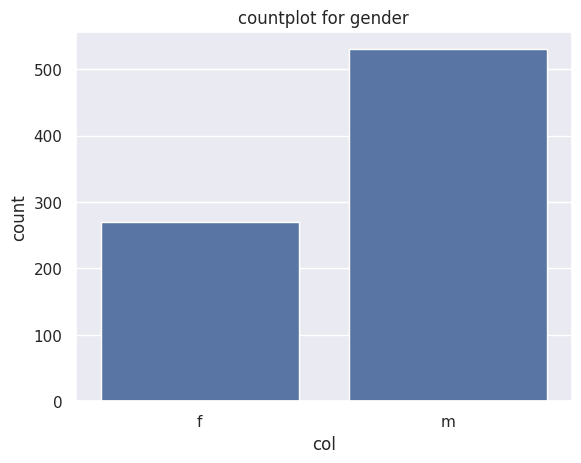

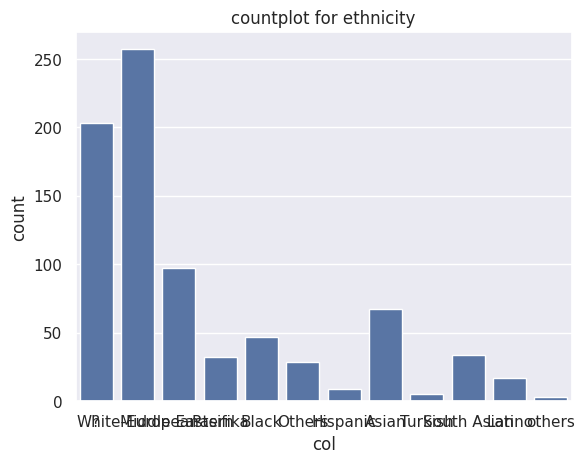

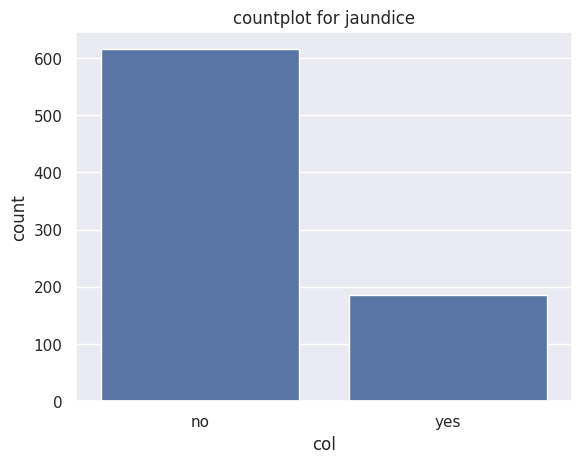

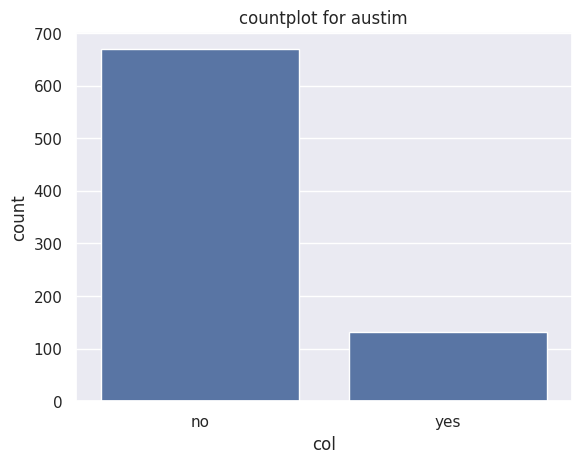

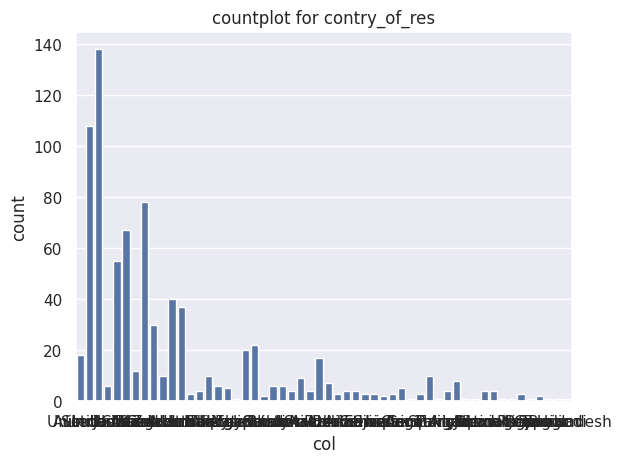

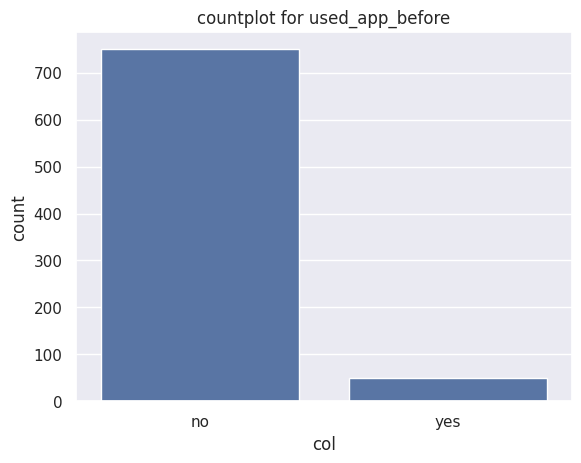

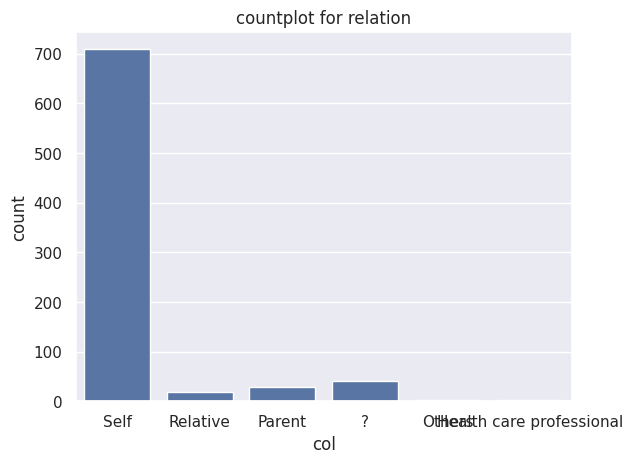

In [177]:
for col in categorical:
  sns.countplot(x=df[col])
  plt.xlabel("col")
  plt.ylabel("count")
  plt.title(f"countplot for {col}")
  plt.show()

<Axes: xlabel='Class/ASD', ylabel='count'>

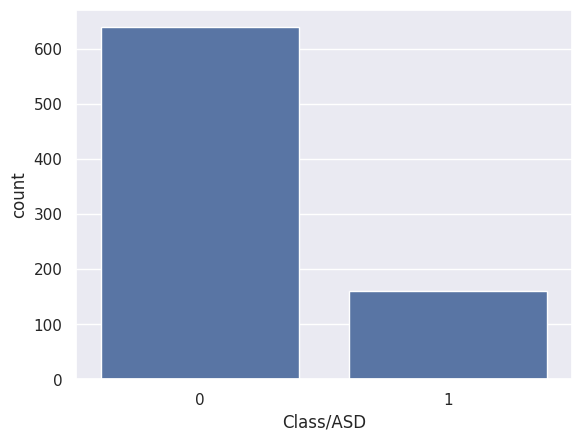

In [178]:
sns.countplot(x=df["Class/ASD"])

handle missing values

In [179]:
df.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [180]:
#handling missing values in ethnicity and relation column
df["ethnicity"]=df["ethnicity"].replace({"?":"Others","others":"Others"})

In [181]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [182]:
df["relation"]=df["relation"].replace(
    {
        "?":"Others",
        "Parent":"Others",
        "Relative":"Others",
        "Health care professional":"Others"}

)

In [183]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

**label encoding**

In [184]:
object_columns=df.select_dtypes(include=["object"]).columns
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [185]:
#initialise a dictionary to store the encoders
encoders = {}

#apply label encoding and store the encoders
for col in object_columns:
  encoder=LabelEncoder()
  df[col]=encoder.fit_transform(df[col])
  encoders[col]=encoder

  #save the encoders as pickle file
  with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)


In [186]:
 encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [187]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


**bivariate analysis**

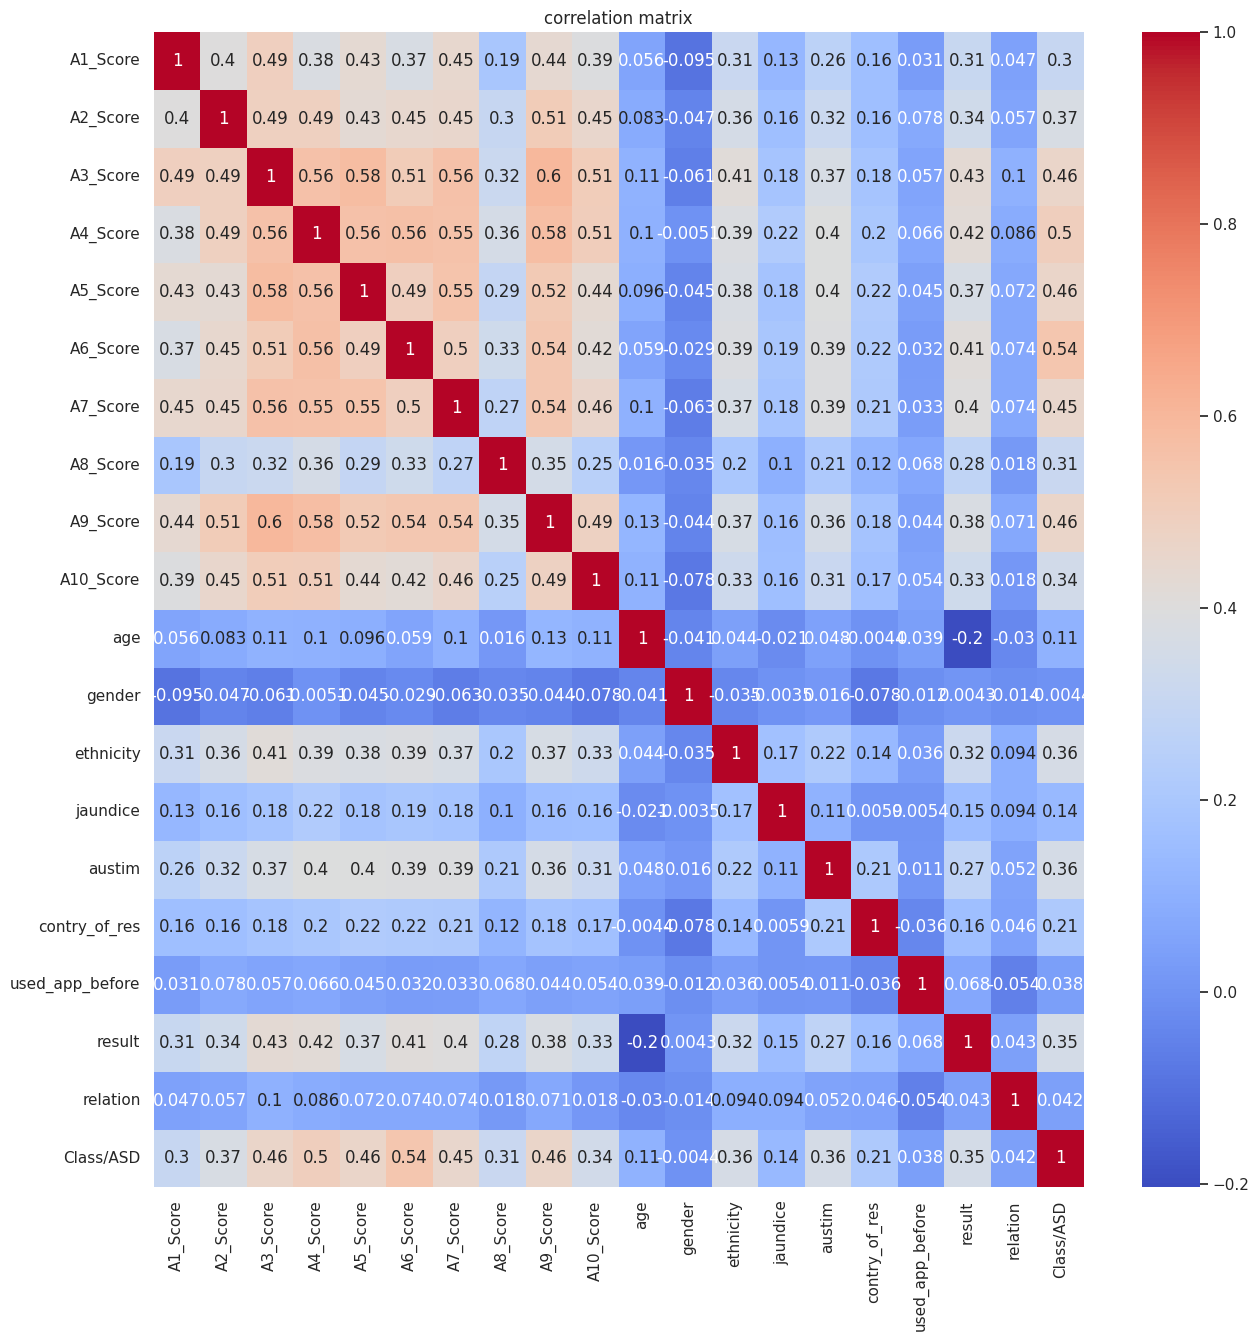

In [188]:
#correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("correlation matrix")
plt.show()

**DATA PREPROCESSING**

In [189]:
#HANDLING OUTLIERS AND FUNCTION TO REPLACE OUTLIERS WITH MEDIAN
def replace_ouliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1

  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR

  median=df[column].median()

  #replacing outliers iwth median value
  df[column]=df[column].apply(lambda x:median if x<lower_limit or x>upper_limit else x)

  return df

In [190]:
#replace outliers in the age column
df=replace_ouliers(df,"age")

#replace outliers in the result column
df=replace_ouliers(df,"result")

**Train Test Split**

In [191]:
x=df.drop(columns=["Class/ASD"])
y=df["Class/ASD"]

In [192]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [193]:
 y_train.shape,y_test.shape

((640,), (160,))

In [194]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [195]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


SMOTE(synthetic minority oversampling technique)

In [196]:
 smote=SMOTE(random_state=42)
 x_new,y_new=smote.fit_resample(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [197]:
y_new.value_counts()

,count
Class/ASD,
1,515
0,515


**model training**

In [207]:
#dictionary of classifiers
models={
    "decison tree":DecisionTreeClassifier(),
    "random forest":RandomForestClassifier(),

}


In [210]:
#dictionary to store the cross validation results
cv_scores={}

#perform 5-fold cross validation for each model
for model_name,model in models.items():
  scores=cross_val_score(model,x_new,y_new,cv=5)
  cv_scores[model_name]=scores
  print(f"{model_name} cross validation accuracy:{np.mean(scores):.2f}")
  print("-"*50 )

decison tree cross validation accuracy:0.85
--------------------------------------------------
random forest cross validation accuracy:0.92
--------------------------------------------------


In [211]:
cv_scores

{'decison tree': array([0.81067961, 0.86893204, 0.85436893, 0.85436893, 0.86893204]),
 'random forest': array([0.93203883, 0.93203883, 0.91262136, 0.90291262, 0.9223301 ])}

**Model selection and hyperparameter tuning**

In [212]:
#initialising models
decison_tree=DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)

In [213]:
#hyperparameter grids for RandomizedSearchCV

param_grid_dt={
    "criterion":["gini","entropy"],
    "max_depth":[None,5,10,15,20,30],
    "min_samples_split":[2,5,10],
}
param_grid_rf={
    "n_estimators":[100,200,300],
    "criterion":["gini","entropy"],
     "max_depth":[None,5,10,15,20,30],
    "min_samples_split":[2,5,10],
}

In [214]:
#hyperparameter tuning for both models
#the below steps can be autyomated by using a for loop or by using a pipeine
#perform randomizedsearchcv for each model

random_search_dt=RandomizedSearchCV(estimator=decison_tree,param_distributions=param_grid_dt,n_iter=10,cv=5,scoring="accuracy",random_state=42)
random_search_dt.fit(x_new,y_new)
random_search_rf=RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid_rf,n_iter=10,cv=5,scoring="accuracy",random_state=42)
random_search_rf.fit(x_new,y_new)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15, 20, 30],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [215]:
print(random_search_dt.best_params_)
print(random_search_rf.best_params_)

{'min_samples_split': 2, 'max_depth': 20, 'criterion': 'entropy'}
{'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 15, 'criterion': 'entropy'}


In [216]:
 print(random_search_dt.best_score_)
 print(random_search_rf.best_score_)

0.8699029126213592
0.9203883495145633


In [220]:
#get the model with best score

best_model=None
best_score=0

if random_search_dt.best_score_>best_score:
  best_score=random_search_dt.best_score_
  best_model=random_search_dt.best_estimator_

if random_search_rf.best_score_>best_score:
  best_score=random_search_rf.best_score_
  best_model=random_search_rf.best_estimator_


In [221]:
print(best_model)
print(best_score)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=300,
                       random_state=42)
0.9203883495145633


In [ ]:
#save the best model
with open("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

In [224]:
#evaluate on test data
y_test_pred=best_model.predict(x_test)
print("accuracy score\n",accuracy_score(y_test,y_test_pred))
print("confusion matrix\n",confusion_matrix(y_test,y_test_pred))
print("classification report\n",classification_report(y_test,y_test_pred))

accuracy score
 0.825
confusion matrix
 [[106  18]
 [ 10  26]]
classification report
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       124
           1       0.59      0.72      0.65        36

    accuracy                           0.82       160
   macro avg       0.75      0.79      0.77       160
weighted avg       0.84      0.82      0.83       160

